## SETUP
- imported pandas to read csv
- imports from sckit library: 
- train_test_split to divide our data into train and test
- OneHotEncoder 
- Standard Scalar to scale our data 
- confusion matrix 
- Logistic Regression, GaussianNB and SVC for ML model
- imported sns and plt for creating plots 


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from dataclasses import dataclass, field
from pprint import pprint
from itables import init_notebook_mode

## DATA INGESTION

In [2]:
df = pd.read_csv(r'data\clean\clean_credit_default.csv')

## 1st MODEL: LOGISTIC REGRESSION 

- Chose all of the given data whether skewed or not and trained our **Logistic Regression Model** on that
- One hot encoding to change strings in data to numeric format
- Fitting the data on x
- Split data for training and testing
- Performed feature scaling to normalize the range
- fit train and test data to logistic regression model
- predicting on test set
- Checking accuracy
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix

Accuracy: 0.8050666666666667
Precision: 0.6843501326259946
Recall: 0.16114928169893816
F1 Score: 0.2608695652173913
Kappa Score: 0.19539742377482106


Text(0.5, 1.0, 'confusion matrix')

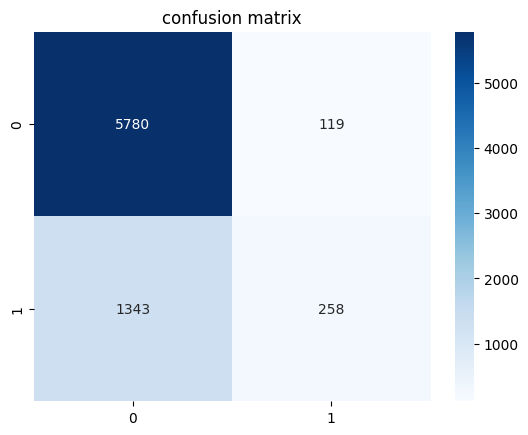

In [3]:
x1 = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Repay_mean', 
         'BILL_APR', 'BILL_MAY', 'BILL_JUN', 'BILL_JUL', 'BILL_AUG', 'BILL_SEPT', 
         'PAID_APR', 'PAID_MAY', 'PAID_JUN', 'PAID_JUL', 'PAID_AUG', 'PAID_SEPT']]
y1 = df['default.payment.next.month']

column_transformer1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'MARRIAGE'])],
                                        remainder='passthrough')

x1 = column_transformer1.fit_transform(x1)

x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size= 0.25, random_state=50) 

st_x1= StandardScaler()    
x1_train= st_x1.fit_transform(x1_train)    
x1_test= st_x1.transform(x1_test)  

logreg1 = LogisticRegression()
logreg1.fit(x1_train, y1_train)

y1_pred= logreg1.predict(x1_test)  

accuracy1 = logreg1.score(x1_test, y1_test)
print('Accuracy:', accuracy1)

precision1 = precision_score(y1_test, y1_pred)
print("Precision:", precision1)

recall1 = recall_score(y1_test, y1_pred)
print("Recall:", recall1)

f1_1= f1_score(y1_test, y1_pred)
print("F1 Score:", f1_1)

kappa1 = cohen_kappa_score(y1_test, y1_pred)
print("Kappa Score:", kappa1)

cm= confusion_matrix(y1_test, y1_pred) 

sns.heatmap(cm, annot=True, cmap = 'Blues', fmt='g')
plt.title("confusion matrix")



In [4]:
@dataclass
class Metric():
    accuracy : float 
    precision : float
    recall : float
    f1_score: float
    kappa_score : float
    data : str = 'all dataset cols'
    model: str = 'logistic regression'
    
#data  = 'all dataset cols'
#model = 'LogisticRegression'
# metric: list[]


mobj1 = Metric(accuracy=accuracy1, precision=precision1, recall=recall1, f1_score=f1_1, kappa_score=kappa1)

print(mobj1)
    

Metric(accuracy=0.8050666666666667, precision=0.6843501326259946, recall=0.16114928169893816, f1_score=0.2608695652173913, kappa_score=0.19539742377482106, data='all dataset cols', model='logistic regression')


In [5]:
# metric = []
# metric.append(mobj1.__dict__)

In [6]:
# pprint(metric)

## 2nd MODEL: LOGISTIC REGRESSION 

- Chose data removing variables we found as unimportant during EDA and trained our **Logistic Regression Model**
- One hot encoding the data
- Fitting the one hot encoded data on x
- Split data for training and testing
- Performed feature scaling on the data to normalize the range 
- fit train and test data to logistic regression model
- predicting on test set
- Checking Accuracy
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix


Accuracy: 0.8065333333333333
Precision: 0.7130681818181818
Recall: 0.15677701436602123
F1 Score: 0.2570404505888377
Kappa Score: 0.19510493627553505


Text(0.5, 1.0, 'Confusion matrix for new dataset')

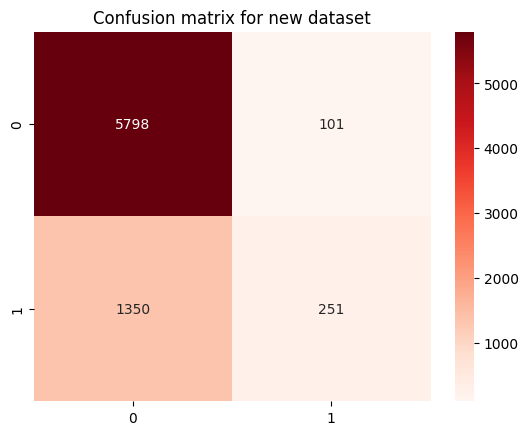

In [9]:
x2 = df[['SEX', 'EDUCATION', 'MARRIAGE', 'Repay_Sum']]
y2 = df['default.payment.next.month']

column_transformer2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'MARRIAGE'])],remainder='passthrough')

x2 = column_transformer2.fit_transform(x2)

x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.25, random_state=50) 

st_x1= StandardScaler()    
x2_train= st_x1.fit_transform(x2_train)    
x2_test= st_x1.transform(x2_test)

logreg1 = LogisticRegression()
logreg1.fit(x2_train, y2_train)

y2_pred = logreg1.predict(x2_test)  

accuracy2 = logreg1.score(x2_test, y2_test)
print('Accuracy:', accuracy2)

precision2 = precision_score(y2_test, y2_pred)
print("Precision:", precision2)

recall2 = recall_score(y2_test, y2_pred)
print("Recall:", recall2)

f1_2 = f1_score(y2_test, y2_pred)
print("F1 Score:", f1_2)

kappa2 = cohen_kappa_score(y2_test, y2_pred)
print("Kappa Score:", kappa2)

cm2 = confusion_matrix(y2_test, y2_pred)

sns.heatmap(cm2, annot=True, cmap='Reds', fmt='g')
plt.title("Confusion matrix for new dataset")

In [10]:
mobj2 = Metric(accuracy=accuracy2, precision=precision2, recall=recall2, f1_score=f1_2, kappa_score=kappa2, data='only important columns')

print(mobj2)

Metric(accuracy=0.8065333333333333, precision=0.7130681818181818, recall=0.15677701436602123, f1_score=0.2570404505888377, kappa_score=0.19510493627553505, data='only important columns', model='logistic regression')


## 3rd MODEL: NAIVE BAYES CLASSIFIER

- Used the same data as model 2 but trained on **Naive Bayes Classifier** to check for better results
- One hot encoding the data
- Fitting the one hot encoded data on x
- Split data for training and testing
- Performed feature scaling on the data to normalize the range
- Fit train and test data to naive bayes classification model
- Predicting on test set
- Checking accuracy 
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix

Accuracy 0.7992
Precision: 0.5826086956521739
Recall: 0.20924422236102436
F1 Score: 0.3079044117647059
Kappa Score: 0.2198966078107032


Text(0.5, 1.0, 'Confusion Matric for naive bayes')

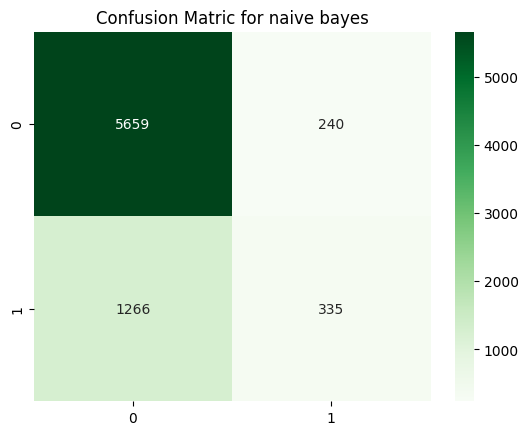

In [11]:
x2 = df[['SEX', 'EDUCATION', 'MARRIAGE', 'Repay_Sum']]
y2 = df['default.payment.next.month']

column_transformer2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'MARRIAGE'])],remainder='passthrough')

x2 = column_transformer2.fit_transform(x2)

x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.25, random_state=50) 

st_x1= StandardScaler()    
x2_train= st_x1.fit_transform(x2_train)    
x2_test= st_x1.transform(x2_test)

nbclass = GaussianNB()  
nbclass.fit(x2_train, y2_train)

y3_pred = nbclass.predict(x2_test)

accuracy3 = nbclass.score(x2_test, y2_test)
print("Accuracy", accuracy3)

precision3 = precision_score(y2_test, y3_pred)
print("Precision:", precision3)

recall3 = recall_score(y2_test, y3_pred)
print("Recall:", recall3)

f1_3= f1_score(y2_test, y3_pred)
print("F1 Score:", f1_3)

kappa3 = cohen_kappa_score(y2_test, y3_pred)
print("Kappa Score:", kappa3)

cm3 = confusion_matrix(y2_test, y3_pred)

sns.heatmap(cm3, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matric for naive bayes")

In [12]:
mobj3 = Metric(accuracy=accuracy3, precision=precision3, recall=recall3, f1_score=f1_3, kappa_score=kappa3, data='only important columns', model='Naive_Bayes')

print(mobj3)

Metric(accuracy=0.7992, precision=0.5826086956521739, recall=0.20924422236102436, f1_score=0.3079044117647059, kappa_score=0.2198966078107032, data='only important columns', model='Naive_Bayes')


## 4th MODEL: SVM (support vector machine)

- Used the same data as model 2 but trained on **SVM** to check for better results
- One hot encoding the data
- Fitting the one hot encoded data on x
- Split data for training and testing
- Performed feature scaling on the data to normalize the range
- Fit train and test data to SVM model
- Predicting on test set
- Checking accuracy 
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix

Accuracy:  0.7865333333333333
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Kappa Score: 0.0


d:\source\repos\OrionDataAnalyticsInternshipJul23\Orion.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion matrix for SVM')

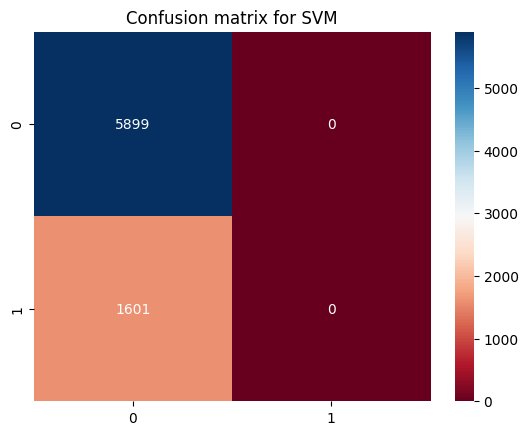

In [13]:
x2 = df[['SEX', 'EDUCATION', 'MARRIAGE', 'Repay_Sum']]
y2 = df['default.payment.next.month']

column_transformer2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'MARRIAGE'])],remainder='passthrough')

x2 = column_transformer2.fit_transform(x2)

x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.25, random_state=50) 

st_x1= StandardScaler()    
x2_train= st_x1.fit_transform(x2_train)    
x2_test= st_x1.transform(x2_test)

svm = SVC(kernel='linear', random_state=50)  
svm.fit(x2_train, y2_train) 

y4_pred = svm.predict(x2_test)

accuracy4 = svm.score(x2_test, y2_test)
print("Accuracy: ",accuracy4)

precision4 = precision_score(y2_test, y4_pred)
print("Precision:", precision4)

recall4 = recall_score(y2_test, y4_pred)
print("Recall:", recall4)

f1_4= f1_score(y2_test, y4_pred)
print("F1 Score:", f1_4)

kappa4 = cohen_kappa_score(y2_test, y4_pred)
print("Kappa Score:", kappa4)

cm4 = confusion_matrix(y2_test, y4_pred)

sns.heatmap(cm4, annot=True, cmap='RdBu', fmt='g')
plt.title("Confusion matrix for SVM")

In [14]:
mobj4 = Metric(accuracy=accuracy4, precision=precision4, recall=recall4, f1_score=f1_4, kappa_score=kappa4, data='only important columns', model='SVM')

print(mobj4)

Metric(accuracy=0.7865333333333333, precision=0.0, recall=0.0, f1_score=0.0, kappa_score=0.0, data='only important columns', model='SVM')


## 5th MODEL: RANDOM FOREST

- Used the same data as model 2 but trained on **Random Forest** to check for better results
- One hot encoding the data
- Fitting the one hot encoded data on x
- Split data for training and testing
- Performed feature scaling on the data to normalize the range
- Fit train and test data to random forest model
- Predicting on test set
- Checking accuracy 
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix

Accuracy: 0.8098666666666666
Precision: 0.6152832674571805
Recall: 0.29169269206745785
F1 Score: 0.39576271186440676
Kappa Score: 0.2995924866018821


Text(0.5, 1.0, 'Confusion matrix for new dataset')

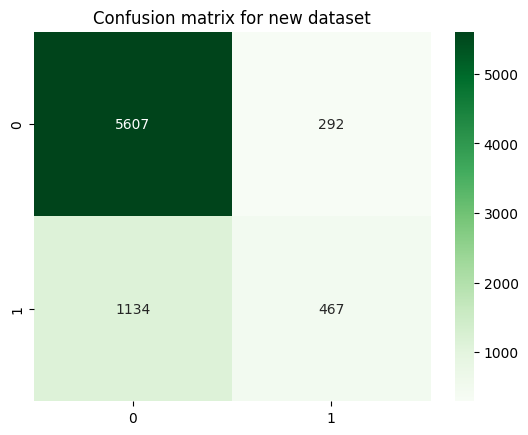

In [15]:
x2 = df[['SEX', 'EDUCATION', 'MARRIAGE', 'Repay_Sum']]
y2 = df['default.payment.next.month']

column_transformer2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'MARRIAGE'])],remainder='passthrough')

x2 = column_transformer2.fit_transform(x2)

x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.25, random_state=50) 

st_x1= StandardScaler()    
x2_train= st_x1.fit_transform(x2_train)    
x2_test= st_x1.transform(x2_test)


rf_classifier = RandomForestClassifier(random_state=50)
rf_classifier.fit(x2_train, y2_train)

y6_pred = rf_classifier.predict(x2_test)

accuracy5 = accuracy_score(y2_test, y6_pred)
print('Accuracy:', accuracy5)

precision5 = precision_score(y2_test, y6_pred)
print("Precision:", precision5)

recall5 = recall_score(y2_test, y6_pred)
print("Recall:", recall5)

f1_5= f1_score(y2_test, y6_pred)
print("F1 Score:", f1_5)

kappa5 = cohen_kappa_score(y2_test, y6_pred)
print("Kappa Score:", kappa5)

cm6 = confusion_matrix(y2_test, y6_pred)

sns.heatmap(cm6, annot=True, cmap='Greens', fmt='g')

plt.title("Confusion matrix for new dataset")


In [16]:
mobj5 = Metric(accuracy=accuracy5, precision=precision5, recall=recall5, f1_score=f1_5, kappa_score=kappa5, data='only important columns', model='Random Forest')

print(mobj5)

Metric(accuracy=0.8098666666666666, precision=0.6152832674571805, recall=0.29169269206745785, f1_score=0.39576271186440676, kappa_score=0.2995924866018821, data='only important columns', model='Random Forest')


- Used the same data as model 1 but removed skewness first and then trained on **Random Forest** for better results
- One hot encoding the data
- Fitting the one hot encoded data on x
- Split data for training and testing
- Performed feature scaling on the data to normalize the range
- Fit train and test data to random forest model
- Predicting on test set
- Checking accuracy 
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix

[[ 1.          0.          0.         ...  0.          6.5366916
   0.        ]
 [ 1.          0.          2.         ...  6.90875478  6.90875478
   0.        ]
 [ 1.          0.          2.         ...  6.90875478  7.31388683
   7.3258075 ]
 ...
 [ 0.          1.          2.         ...  9.99884319  0.
   0.        ]
 [ 0.          1.          0.         ...  7.0724219   8.13446757
  11.36095075]
 [ 0.          1.          0.         ...  7.26612878  7.49609735
   7.63964229]]
(30000, 19) (30000,)


Accuracy: 0.8125333333333333
Precision: 0.6086956521739131
Recall: 0.3410368519675203
F1 Score: 0.4371497197758207
Kappa Score: 0.33523741007738483


Text(0.5, 1.0, 'Confusion Matrix')

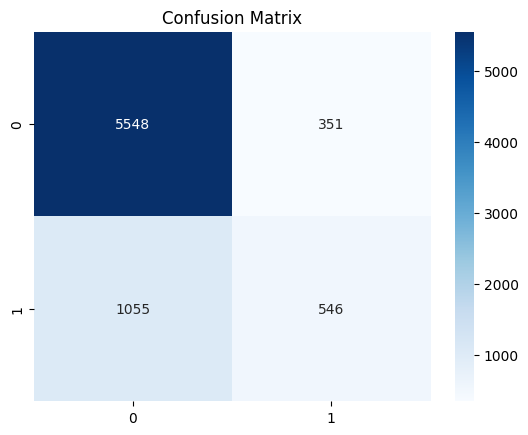

In [17]:
x1 = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Repay_mean', 
         'BILL_APR', 'BILL_MAY', 'BILL_JUN', 'BILL_JUL', 'BILL_AUG', 'BILL_SEPT', 
         'PAID_APR', 'PAID_MAY', 'PAID_JUN', 'PAID_JUL', 'PAID_AUG', 'PAID_SEPT']]
y1 = df['default.payment.next.month']

cols_to_transform = ['BILL_APR', 'BILL_MAY', 'BILL_JUN', 'BILL_JUL', 'BILL_AUG', 'BILL_SEPT', 
                     'PAID_APR', 'PAID_MAY', 'PAID_JUN', 'PAID_JUL', 'PAID_AUG', 'PAID_SEPT']
for col in cols_to_transform:
    if x1[col].min() >= 0:
        x1.loc[:,col] = np.log1p(x1.loc[:,col])
    else:
        x1.loc[:,col] = np.log1p(x1.loc[:,col] + (-1 * x1.loc[:,col].min()))

column_transformer1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX']),
                                                       ('oe', OrdinalEncoder(), ['MARRIAGE'])], 
                                                       remainder='passthrough')
x1 = column_transformer1.fit_transform(x1)
print(x1)

x1 = pd.DataFrame(x1)
print(x1.shape,y1.shape)


x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=50)

rf_classifier = RandomForestClassifier(random_state=50)
rf_classifier.fit(x1_train, y1_train)

y1_pred = rf_classifier.predict(x1_test)

accuracy5a = rf_classifier.score(x1_test, y1_test)
print('Accuracy:', accuracy5a)

precision5a = precision_score(y1_test, y1_pred)
print("Precision:", precision5a)

recall5a = recall_score(y1_test, y1_pred)
print("Recall:", recall5a)

f1_5a = f1_score(y1_test, y1_pred)
print("F1 Score:", f1_5a)

kappa5a = cohen_kappa_score(y1_test, y1_pred)
print("Kappa Score:", kappa5a)

cm = confusion_matrix(y1_test, y1_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")


In [18]:
mobj5a = Metric(accuracy=accuracy5a, precision=precision5a, recall=recall5a, f1_score=f1_5a, kappa_score=kappa5a, data='all columns with skewedness removed', model='Random Forest')

print(mobj5a)

Metric(accuracy=0.8125333333333333, precision=0.6086956521739131, recall=0.3410368519675203, f1_score=0.4371497197758207, kappa_score=0.33523741007738483, data='all columns with skewedness removed', model='Random Forest')


- Used REPAY_SEPT and the skewness removed data and then trained on **Random Forest** for better results
- One hot encoding the data
- Fitting the one hot encoded data on x
- Split data for training and testing
- Performed feature scaling on the data to normalize the range
- Fit train and test data to random forest model
- Predicting on test set
- Checking accuracy 
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix

Accuracy: 0.8189333333333333
Precision: 0.6394948335246843
Recall: 0.34790755777638976
F1 Score: 0.4506472491909385
Kappa Score: 0.35337676999221257


Text(0.5, 1.0, 'Confusion Matrix')

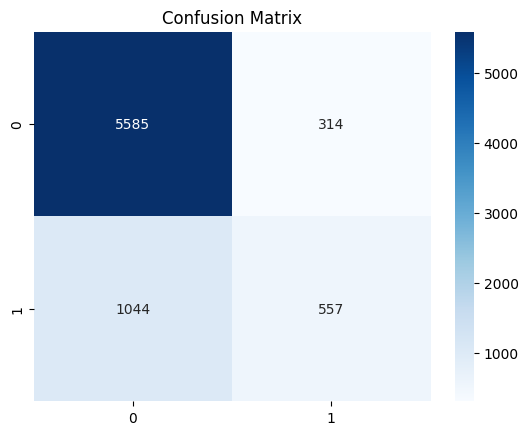

In [19]:
x1 = df[[ 'REPAY_SEPT',
         'BILL_APR', 'BILL_MAY', 'BILL_JUN', 'BILL_JUL', 'BILL_AUG', 'BILL_SEPT', 
         'PAID_APR', 'PAID_MAY', 'PAID_JUN', 'PAID_JUL', 'PAID_AUG', 'PAID_SEPT']]
y1 = df['default.payment.next.month']

cols_to_transform = ['BILL_APR', 'BILL_MAY', 'BILL_JUN', 'BILL_JUL', 'BILL_AUG', 'BILL_SEPT', 
                     'PAID_APR', 'PAID_MAY', 'PAID_JUN', 'PAID_JUL', 'PAID_AUG', 'PAID_SEPT']
for col in cols_to_transform:
    if x1[col].min() >= 0:
        x1.loc[:,col] = np.log1p(x1.loc[:,col])
    else:
        x1.loc[:,col] = np.log1p(x1.loc[:,col] + (-1 * x1.loc[:,col].min()))

x1 = pd.DataFrame(x1)

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=50)

rf_classifier = RandomForestClassifier(random_state=50)
rf_classifier.fit(x1_train, y1_train)

y1_pred = rf_classifier.predict(x1_test)

accuracy5b = rf_classifier.score(x1_test, y1_test)
print('Accuracy:', accuracy5b)

precision5b = precision_score(y1_test, y1_pred)
print("Precision:", precision5b)

recall5b = recall_score(y1_test, y1_pred)
print("Recall:", recall5b)

f1_5b = f1_score(y1_test, y1_pred)
print("F1 Score:", f1_5b)

kappa5b = cohen_kappa_score(y1_test, y1_pred)
print("Kappa Score:", kappa5b)

cm = confusion_matrix(y1_test, y1_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")


In [20]:
mobj5b = Metric(accuracy=accuracy5b, precision=precision5b, recall=recall5b, f1_score=f1_5b,
                 kappa_score=kappa5b, data='repay_sept and bill, paid with skewedness removed', 
                 model='Random Forest')

print(mobj5b)

Metric(accuracy=0.8189333333333333, precision=0.6394948335246843, recall=0.34790755777638976, f1_score=0.4506472491909385, kappa_score=0.35337676999221257, data='repay_sept and bill, paid with skewedness removed', model='Random Forest')


## 6th MODEL: LOGISTIC REGRESSION 

- Training on **Logistic Regression** the column that had most impact during EDA
- split data for training and testing
- Performed feature scaling on the data to normalize the range 
- fit train and test data to logistic regression model
- predicting on test set
- Checking Accuracy
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix


Accuracy: 0.8261333333333334
Precision: 0.6931079323797139
Recall: 0.3329169269206746
F1 Score: 0.449789029535865
Kappa Score: 0.3613128794980258


Text(0.5, 1.0, 'Confusion matrix for new dataset')

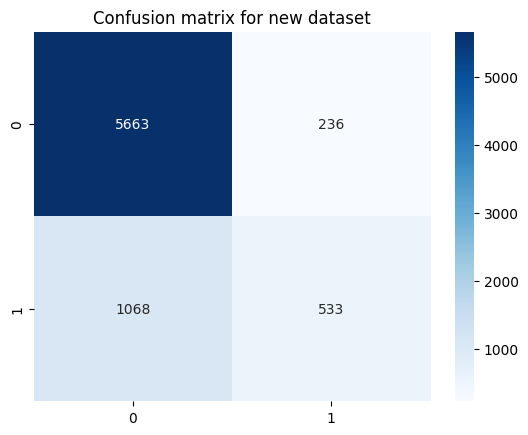

In [21]:
x5 = df[['REPAY_SEPT']]
y5 = df['default.payment.next.month']

x5_train, x5_test, y5_train, y5_test= train_test_split(x5, y5, test_size= 0.25, random_state=50) 

logreg1 = LogisticRegression(random_state=50)
logreg1.fit(x5_train, y5_train)


y5_pred = logreg1.predict(x5_test)  

accuracy6 = logreg1.score(x5_test, y5_test)
print('Accuracy:', accuracy6)

# accuracy6 = accuracy_score(x5_test, y5_test)
# print('Accuracy_score:', accuracy6)

precision6 = precision_score(y5_test, y5_pred)
print("Precision:", precision6)

recall6 = recall_score(y5_test, y5_pred)
print("Recall:", recall6)

f1_6= f1_score(y5_test, y5_pred)
print("F1 Score:", f1_6)

kappa6 = cohen_kappa_score(y5_test, y5_pred)
print("Kappa Score:", kappa6)

cm5 = confusion_matrix(y5_test, y5_pred)

sns.heatmap(cm5, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion matrix for new dataset")

In [22]:
mobj6 = Metric(accuracy=accuracy6, precision=precision6, recall=recall6, f1_score=f1_6, kappa_score=kappa6, data='repay_Sept', model='logistic regression')

print(mobj6)

Metric(accuracy=0.8261333333333334, precision=0.6931079323797139, recall=0.3329169269206746, f1_score=0.449789029535865, kappa_score=0.3613128794980258, data='repay_Sept', model='logistic regression')


- Training on **Logistic Regression** the column that had most impact during EDA along with SEX
- split data for training and testing
- Performed feature scaling on the data to normalize the range 
- fit train and test data to logistic regression model
- predicting on test set
- Checking Accuracy
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix


Accuracy: 0.8261333333333334
Precision: 0.6931079323797139
Recall: 0.3329169269206746
F1 Score: 0.449789029535865
Kappa Score: 0.3613128794980258


Text(0.5, 1.0, 'Confusion matrix for new dataset')

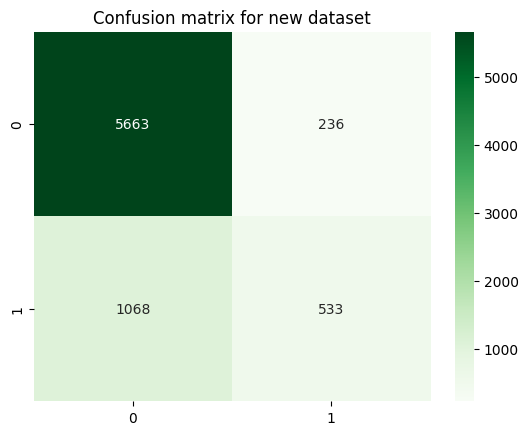

In [23]:
x5 = df[['REPAY_SEPT','SEX']]
y5 = df['default.payment.next.month']

column_transformer2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX'])],remainder='passthrough')
x5 = column_transformer2.fit_transform(x5)

x5_train, x5_test, y5_train, y5_test= train_test_split(x5, y5, test_size= 0.25, random_state=50) 

logreg1 = LogisticRegression(random_state=50)
logreg1.fit(x5_train, y5_train)


y5_pred = logreg1.predict(x5_test)  

accuracy6a = logreg1.score(x5_test, y5_test)
print('Accuracy:', accuracy6a)

#accuracy = accuracy_score(x5_test, y5_test)
#print('Accuracy_score:', accuracy)

precision6a = precision_score(y5_test, y5_pred)
print("Precision:", precision6a)

recall6a = recall_score(y5_test, y5_pred)
print("Recall:", recall6a)

f1_6a= f1_score(y5_test, y5_pred)
print("F1 Score:", f1_6a)

kappa6a = cohen_kappa_score(y5_test, y5_pred)
print("Kappa Score:", kappa6a)

cm5 = confusion_matrix(y5_test, y5_pred)

sns.heatmap(cm5, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion matrix for new dataset")

- Training on **Logistic Regression** the column that had most impact during EDA along with MARRIAGE
- split data for training and testing
- Performed feature scaling on the data to normalize the range 
- fit train and test data to logistic regression model
- predicting on test set
- Checking Accuracy
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix

In [24]:
mobj6a = Metric(accuracy=accuracy6a, precision=precision6a, recall=recall6a, f1_score=f1_6a, kappa_score=kappa6a, data='repay_Sept and sex', model='logistic regression')

print(mobj6a)

Metric(accuracy=0.8261333333333334, precision=0.6931079323797139, recall=0.3329169269206746, f1_score=0.449789029535865, kappa_score=0.3613128794980258, data='repay_Sept and sex', model='logistic regression')


Accuracy: 0.8261333333333334
Precision: 0.6931079323797139
Recall: 0.3329169269206746
F1 Score: 0.449789029535865
Kappa Score: 0.3613128794980258


Text(0.5, 1.0, 'Confusion matrix for new dataset')

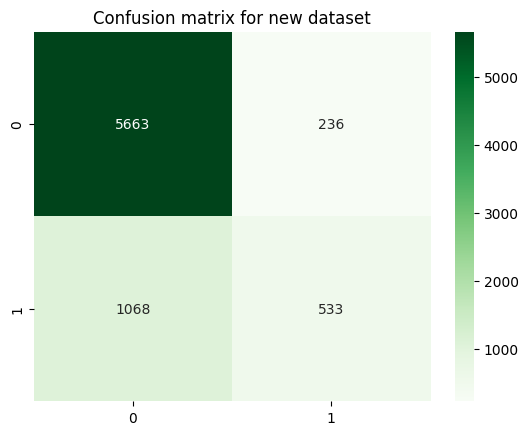

In [25]:
x5 = df[['REPAY_SEPT','MARRIAGE']]
y5 = df['default.payment.next.month']

column_transformer2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['MARRIAGE'])],remainder='passthrough')
x5 = column_transformer2.fit_transform(x5)

x5_train, x5_test, y5_train, y5_test= train_test_split(x5, y5, test_size= 0.25, random_state=50) 

logreg1 = LogisticRegression(random_state=50)
logreg1.fit(x5_train, y5_train)


y5_pred = logreg1.predict(x5_test)  

accuracy6b = logreg1.score(x5_test, y5_test)
print('Accuracy:', accuracy6b)

#accuracy = accuracy_score(x5_test, y5_test)
#print('Accuracy_score:', accuracy)

precision6b = precision_score(y5_test, y5_pred)
print("Precision:", precision6b)

recall6b = recall_score(y5_test, y5_pred)
print("Recall:", recall6b)

f1_6b= f1_score(y5_test, y5_pred)
print("F1 Score:", f1_6b)

kappa6b = cohen_kappa_score(y5_test, y5_pred)
print("Kappa Score:", kappa6b)

cm5 = confusion_matrix(y5_test, y5_pred)

sns.heatmap(cm5, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion matrix for new dataset")

In [26]:
mobj6b = Metric(accuracy=accuracy6b, precision=precision6b, recall=recall6b, f1_score=f1_6b,
                 kappa_score=kappa6b, data='repay_Sept and marriage', model='logistic regression')

print(mobj6b)

Metric(accuracy=0.8261333333333334, precision=0.6931079323797139, recall=0.3329169269206746, f1_score=0.449789029535865, kappa_score=0.3613128794980258, data='repay_Sept and marriage', model='logistic regression')


- Training on **Logistic Regression** the column that had most impact during EDA along with EDUCATION
- split data for training and testing
- Performed feature scaling on the data to normalize the range 
- fit train and test data to logistic regression model
- predicting on test set
- Checking Accuracy
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix

Accuracy: 0.8261333333333334
Precision: 0.6931079323797139
Recall: 0.3329169269206746
F1 Score: 0.449789029535865
Kappa Score: 0.3613128794980258


Text(0.5, 1.0, 'Confusion matrix for new dataset')

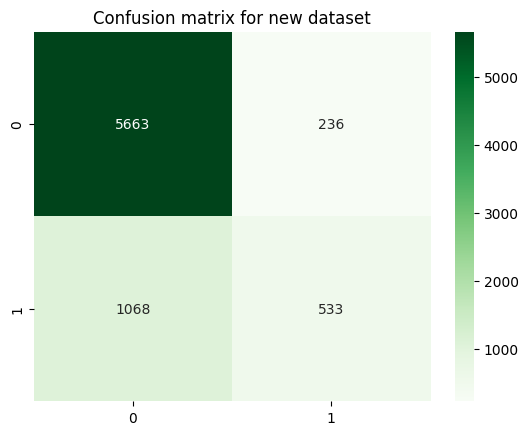

In [27]:
x5 = df[['REPAY_SEPT','EDUCATION']]
y5 = df['default.payment.next.month']

x5_train, x5_test, y5_train, y5_test= train_test_split(x5, y5, test_size= 0.25, random_state=50) 

logreg1 = LogisticRegression(random_state=50)
logreg1.fit(x5_train, y5_train)


y5_pred = logreg1.predict(x5_test)  

accuracy6c = logreg1.score(x5_test, y5_test)
print('Accuracy:', accuracy6c)

#accuracy = accuracy_score(x5_test, y5_test)
#print('Accuracy_score:', accuracy)

precision6c = precision_score(y5_test, y5_pred)
print("Precision:", precision6c)

recall6c = recall_score(y5_test, y5_pred)
print("Recall:", recall6c)

f1_6c= f1_score(y5_test, y5_pred)
print("F1 Score:", f1_6c)

kappa6c = cohen_kappa_score(y5_test, y5_pred)
print("Kappa Score:", kappa6c)

cm5 = confusion_matrix(y5_test, y5_pred)

sns.heatmap(cm5, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion matrix for new dataset")

In [28]:
mobj6c = Metric(accuracy=accuracy6c, precision=precision6c, recall=recall6c, f1_score=f1_6c, 
                kappa_score=kappa6c, data='repay_Sept and education', model='logistic regression')

print(mobj6c)

Metric(accuracy=0.8261333333333334, precision=0.6931079323797139, recall=0.3329169269206746, f1_score=0.449789029535865, kappa_score=0.3613128794980258, data='repay_Sept and education', model='logistic regression')


- Training on **Logistic Regression** the column that had most impact during EDA along with AGE
- split data for training and testing
- Performed feature scaling on the data to normalize the range 
- fit train and test data to logistic regression model
- predicting on test set
- Checking Accuracy
- Calculate precision
- Calculate recall
- Calculate F1 score
- Calculate kappa
- Visual representation of accuracy using confusion matrix

Accuracy: 0.826
Precision: 0.6932114882506527
Recall: 0.3316677076826983
F1 Score: 0.44866920152091255
Kappa Score: 0.3602844173846296


Text(0.5, 1.0, 'Confusion matrix for new dataset')

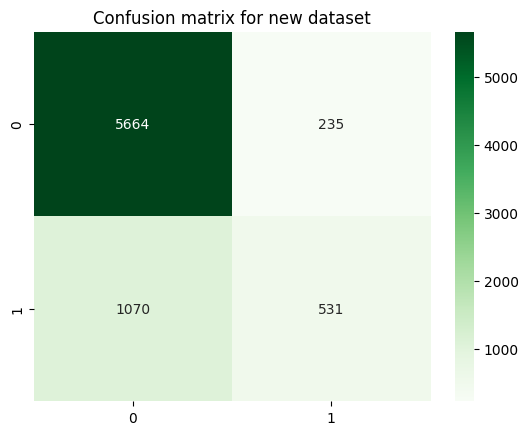

In [29]:
x5 = df[['REPAY_SEPT','AGE']]
y5 = df['default.payment.next.month']

x5_train, x5_test, y5_train, y5_test= train_test_split(x5, y5, test_size= 0.25, random_state=50) 

logreg1 = LogisticRegression(random_state=50)
logreg1.fit(x5_train, y5_train)


y5_pred = logreg1.predict(x5_test)  

accuracy6d = logreg1.score(x5_test, y5_test)
print('Accuracy:', accuracy6d)

#accuracy = accuracy_score(x5_test, y5_test)
#print('Accuracy_score:', accuracy)

precision6d = precision_score(y5_test, y5_pred)
print("Precision:", precision6d)

recall6d = recall_score(y5_test, y5_pred)
print("Recall:", recall6d)

f1_6d= f1_score(y5_test, y5_pred)
print("F1 Score:", f1_6d)

kappa6d = cohen_kappa_score(y5_test, y5_pred)
print("Kappa Score:", kappa6d)

cm5 = confusion_matrix(y5_test, y5_pred)

sns.heatmap(cm5, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion matrix for new dataset")

In [30]:
mobj6d = Metric(accuracy=accuracy6d, precision=precision6d, recall=recall6d, f1_score=f1_6d, 
                kappa_score=kappa6d, data='repay_Sept and age', model='logistic regression')

print(mobj6d)

Metric(accuracy=0.826, precision=0.6932114882506527, recall=0.3316677076826983, f1_score=0.44866920152091255, kappa_score=0.3602844173846296, data='repay_Sept and age', model='logistic regression')


## Merging the objects and forming dataframe

In [39]:
metric_objects = [mobj1, mobj2, mobj3, mobj4, mobj5, mobj5a, mobj5b, mobj6, mobj6a, mobj6b, mobj6c, mobj6d]
metric_dicts = [mobj.__dict__ for mobj in metric_objects]
metric_df = pd.DataFrame(metric_dicts)

desired_columns = ['model', 'data','accuracy', 'precision', 'recall', 'f1_score', 'kappa_score']
metric_df = metric_df[desired_columns]

In [41]:
init_notebook_mode(all_interactive=True)
metric_df

<IPython.core.display.Javascript object>

model                                               data  \
0   logistic regression                                   all dataset cols   
1   logistic regression                             only important columns   
2           Naive_Bayes                             only important columns   
3                   SVM                             only important columns   
4         Random Forest                             only important columns   
5         Random Forest                all columns with skewedness removed   
6         Random Forest  repay_sept and bill, paid with skewedness removed   
7   logistic regression                                         repay_Sept   
8   logistic regression                                 repay_Sept and sex   
9   logistic regression                            repay_Sept and marriage   
10  logistic regression                           repay_Sept and education   
11  logistic regression                                 repay_Sept and age   

    accuracy  precision    recall  f1_score  kappa_score  
0   0.805067   0.684350  0.161149  0.260870     0.195397  
1   0.806533   0.713068  0.156777  0.257040     0.195105  
2   0.799200   0.582609  0.209244  0.307904     0.219897  
3   0.786533   0.000000  0.000000  0.000000     0.000000  
4   0.809867   0.615283  0.291693  0.395763     0.299592  
5   0.812533   0.608696  0.341037  0.437150     0.335237  
6   0.818933   0.639495  0.347908  0.450647     0.353377  
7   0.826133   0.693108  0.332917  0.449789     0.361313  
8   0.826133   0.693108  0.332917  0.449789     0.361313  
9   0.826133   0.693108  0.332917  0.449789     0.361313  
10  0.826133   0.693108  0.332917  0.449789     0.361313  
11  0.826000   0.693211  0.331668  0.448669     0.360284